In [3]:
path = "/Users/evangray/Desktop/Projects/prosperity/prosperity-3/Data Logs/Round 1/"

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Kelp MA RESIN MR
# log_path = "/Users/evangray/Desktop/Projects/prosperity/prosperity-3/Data Logs/Round 1/09125e0c-c6ff-4960-a771-9098bd41488b.csv"
# Tutorial 3
log_path = "/Users/evangray/Desktop/Projects/prosperity/prosperity-3/Data Logs/Round 1/50ad9b64-ef81-4d30-9b8d-740b6eb5500f.csv"
df = pd.read_csv(log_path, delimiter =";")
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.000000
1,1,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.000000
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.000000
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,0.000000
4,1,100,SQUID_INK,1837,1,1836.0,2.0,1835.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,99800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.5,0.000000
2996,1,99800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,864.000000
2997,1,99900,SQUID_INK,1816,27,NaN,NaN,NaN,NaN,1819,28,NaN,NaN,NaN,NaN,1817.5,0.000000
2998,1,99900,RAINFOREST_RESIN,9998,6,9996.0,1.0,9995.0,27.0,10004,1,10005.0,27.0,NaN,NaN,10001.0,864.000000


In [34]:
squid_df = df[df["product"] == "SQUID_INK"].reset_index()
kelp_df = df[df["product"] == "KELP"].reset_index()
resin_df = df[df["product"] == "RAINFOREST_RESIN"].reset_index()

In [35]:
resin_df
# Calculate average up to point
resin_df['mid_price_avg'] = resin_df['mid_price'].expanding().mean().shift(1)


In [36]:
activities

NameError: name 'activities' is not defined

In [37]:
prices = [col for col in resin_df.columns if "price" in col]
for price in prices:
    print(f"{price}: {np.nanmin(resin_df[price])}")
    print(f"{price}: {np.nanmax(resin_df[price])}")
    print()



bid_price_1: 9995
bid_price_1: 10002

bid_price_2: 9995.0
bid_price_2: 10000.0

bid_price_3: 9995.0
bid_price_3: 9998.0

ask_price_1: 9998
ask_price_1: 10005

ask_price_2: 10000.0
ask_price_2: 10005.0

ask_price_3: 10004.0
ask_price_3: 10005.0

mid_price: 9996.5
mid_price: 10003.5

mid_price_avg: 9999.847826086956
mid_price_avg: 10002.25



In [23]:
kelp_df

,index,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.000000
1,3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,0.000000
2,7,1,200,KELP,2032,22,NaN,NaN,NaN,NaN,2035,22,NaN,NaN,NaN,NaN,2033.5,0.000000
3,9,1,300,KELP,2034,1,2032.0,26.0,NaN,NaN,2035,26,NaN,NaN,NaN,NaN,2034.5,0.000000
4,14,1,400,KELP,2032,28,NaN,NaN,NaN,NaN,2035,28,NaN,NaN,NaN,NaN,2033.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,1,99500,KELP,2034,20,NaN,NaN,NaN,NaN,2038,20,NaN,NaN,NaN,NaN,2036.0,23.664062
996,2989,1,99600,KELP,2034,28,NaN,NaN,NaN,NaN,2038,28,NaN,NaN,NaN,NaN,2036.0,24.031250
997,2991,1,99700,KELP,2034,26,NaN,NaN,NaN,NaN,2038,26,NaN,NaN,NaN,NaN,2036.0,24.605469
998,2994,1,99800,KELP,2034,26,NaN,NaN,NaN,NaN,2038,26,NaN,NaN,NaN,NaN,2036.0,23.074219


In [62]:
window_lengths = [3, 5, 10, 20, 30, 50, 100, 200]

# Assuming kelp_df is your existing DataFrame with a 'mid_price' column.
# Loop over each window length and compute the moving average.
diff = pd.DataFrame()
diff["mid_price"] = kelp_df["mid_price"] - squid_df["mid_price"]
for window in window_lengths:
    # Create a new column for each moving average; the new column name will indicate the window size.
    kelp_df[f'ma_{window}'] = kelp_df['mid_price'].rolling(window=window).mean()
    squid_df[f'ma_{window}'] = squid_df['mid_price'].rolling(window=window).mean()
    diff[f'ma_{window}'] = diff['mid_price'].rolling(window=window).mean()

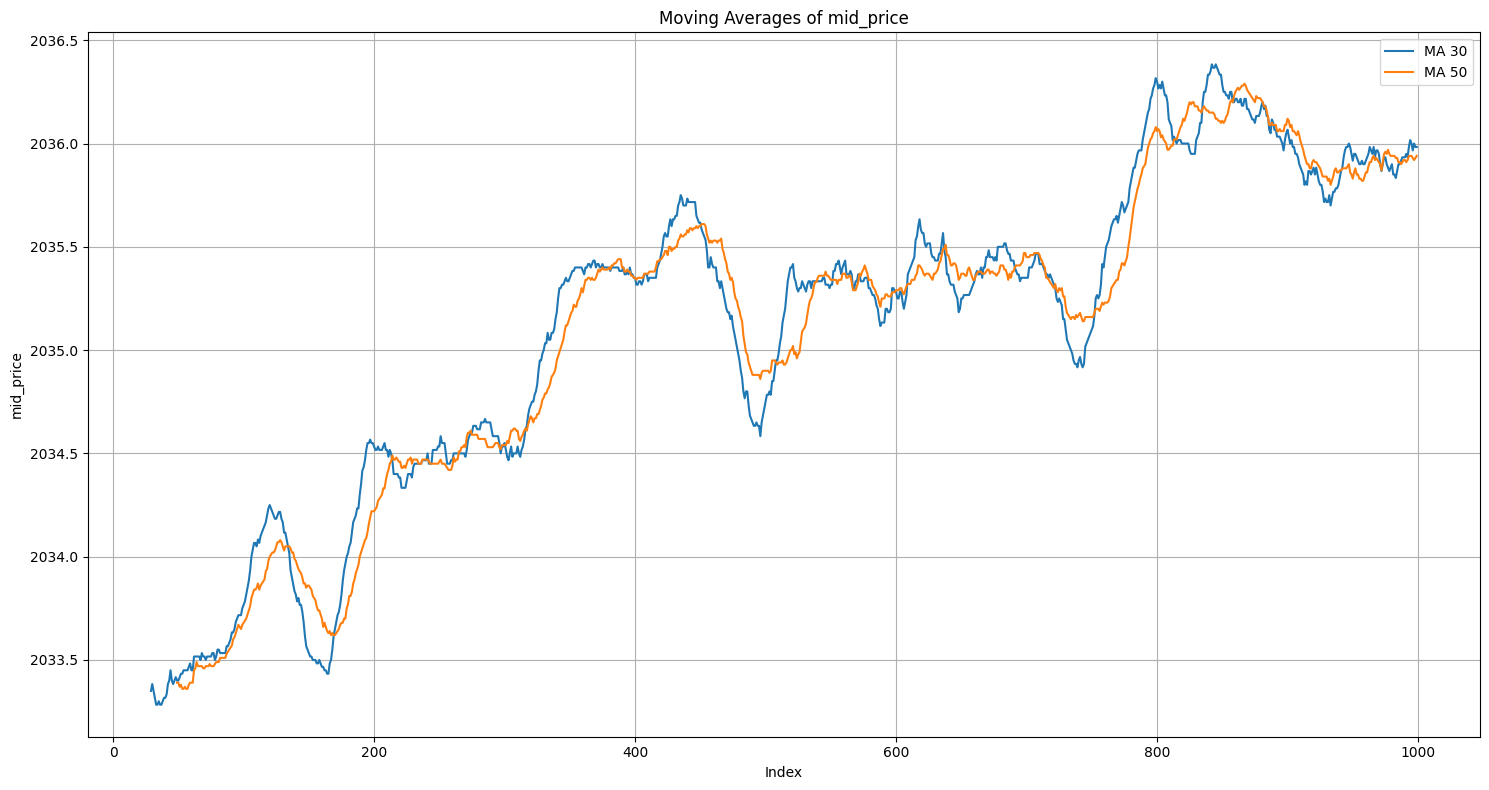

In [44]:
plt.figure(figsize=(15, 8))
# plt.plot(kelp_df['mid_price'], label='mid_price', linewidth=2)

test_lengths = [30, 50]

for window in test_lengths:
    plt.plot(kelp_df[f'ma_{window}'], label=f'MA {window}')

plt.title('Moving Averages of mid_price (Kelp)')
plt.xlabel('Index')
plt.ylabel('mid_price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

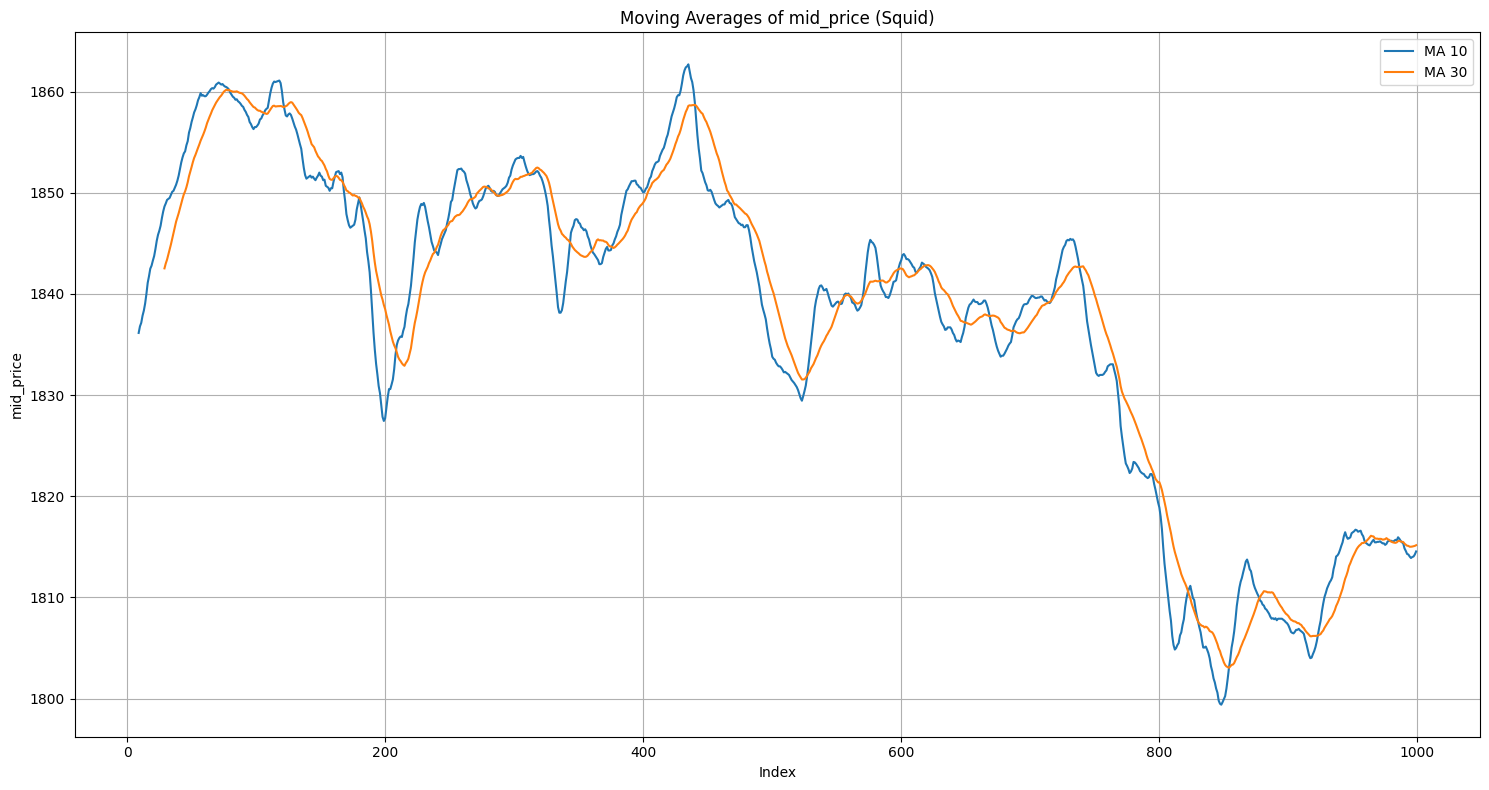

In [53]:
plt.figure(figsize=(15, 8))
# plt.plot(kelp_df['mid_price'], label='mid_price', linewidth=2)
window_lengths = [3, 5, 10, 20, 30, 50, 100, 200]
test_lengths = [10, 30]

for window in test_lengths:
    plt.plot(squid_df[f'ma_{window}'], label=f'MA {window}')

plt.title('Moving Averages of mid_price (Squid)')
plt.xlabel('Index')
plt.ylabel('mid_price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Kelp Price - Squid Price')

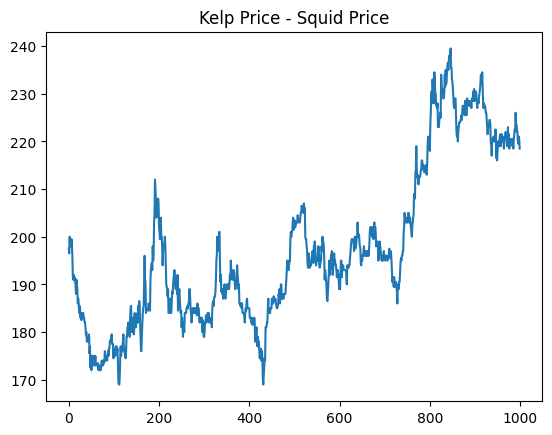

In [66]:
plt.plot(kelp_df["mid_price"] - squid_df["mid_price"])
plt.title("Kelp Price - Squid Price")

Text(0.5, 1.0, 'Squid Price')

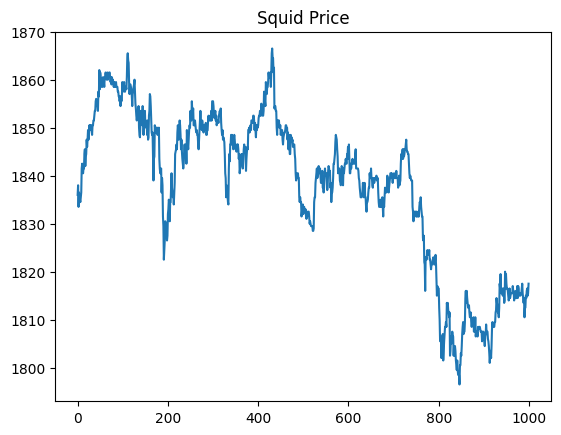

In [60]:
plt.plot(squid_df["mid_price"])
plt.title("Squid Price")

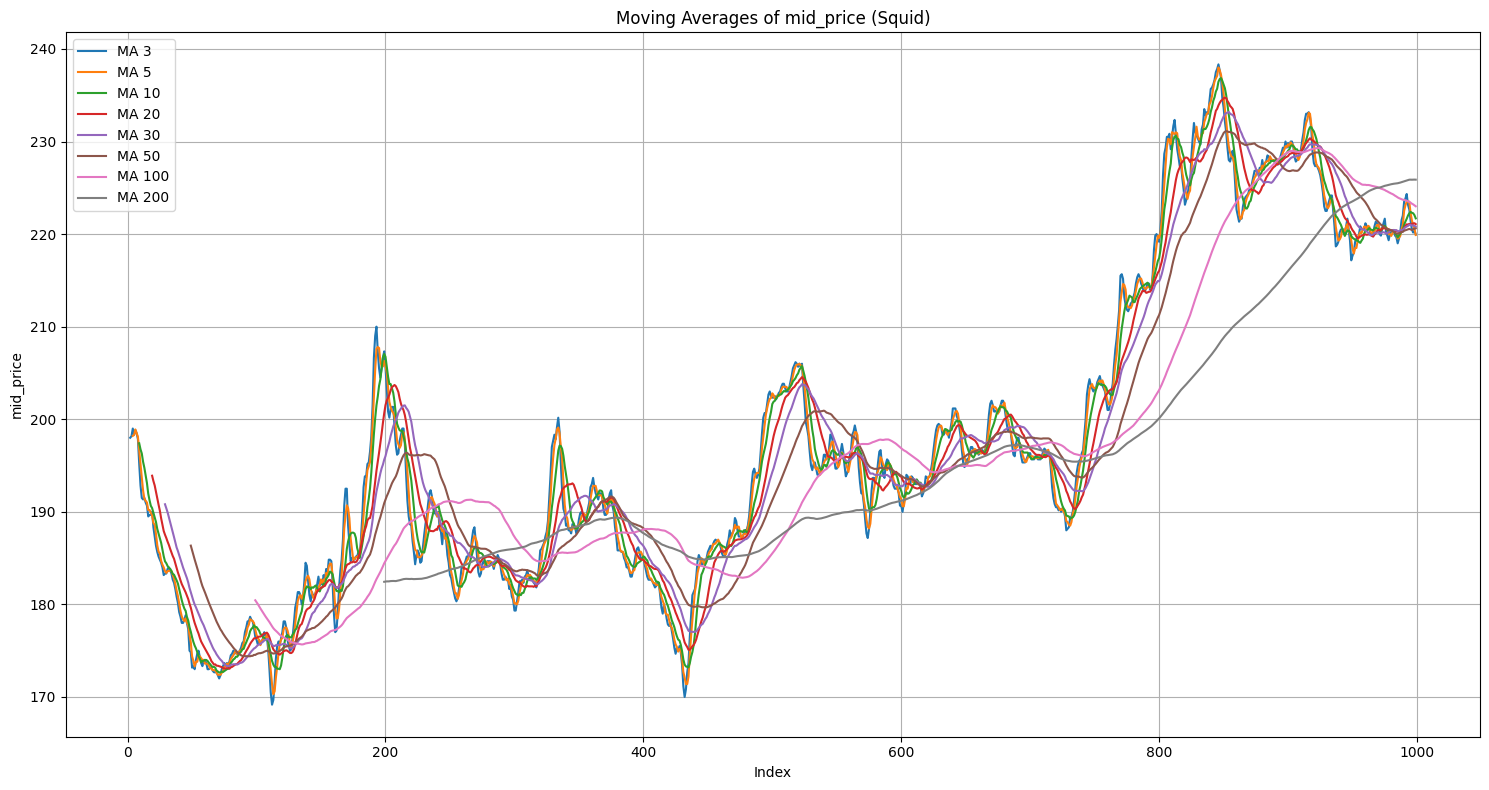

In [64]:
plt.figure(figsize=(15, 8))
# plt.plot(kelp_df['mid_price'], label='mid_price', linewidth=2)
window_lengths = [3, 5, 10, 20, 30, 50, 100, 200]
test_lengths = [10, 30]

for window in window_lengths:
    plt.plot(diff[f'ma_{window}'], label=f'MA {window}')

plt.title('Moving Averages of mid_price (Squid)')
plt.xlabel('Index')
plt.ylabel('mid_price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()